In [ ]:
from torch import cuda

cuda.is_available()

True

##import & Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import bisect
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('/content/drive/MyDrive/프로젝트/HD현대 AI Challenge /data/train.csv').drop(columns=['SAMPLE_ID'])
test = pd.read_csv('/content/drive/MyDrive/프로젝트/HD현대 AI Challenge /data/test.csv').drop(columns=['SAMPLE_ID'])

train, test SAMPLE_ID 삭제

## EDA & Preprocessing

In [ ]:
# 데이터 탐색
display(train.head())
display(train.info())
display(train.describe())
# 결측치 확인
display(train.isnull().sum())

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,20.0,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,20.0,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,20.0,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,10.0,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,10.0,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367441 entries, 0 to 367440
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARI_CO              367441 non-null  object 
 1   ARI_PO              367441 non-null  object 
 2   SHIP_TYPE_CATEGORY  367441 non-null  object 
 3   DIST                367441 non-null  float64
 4   ATA                 367441 non-null  object 
 5   ID                  367441 non-null  object 
 6   BREADTH             367440 non-null  float64
 7   BUILT               367441 non-null  int64  
 8   DEADWEIGHT          367441 non-null  int64  
 9   DEPTH               367440 non-null  float64
 10  DRAUGHT             367440 non-null  float64
 11  GT                  367441 non-null  int64  
 12  LENGTH              367440 non-null  float64
 13  SHIPMANAGER         367441 non-null  object 
 14  FLAG                367441 non-null  object 
 15  U_WIND              213955 non-nul

None

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,19.315929,30.550239,14.746082,63588.867056,16.476540,11.086708,41346.606612,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,61.877118
std,30.903272,10.957441,7.040392,63558.705308,6.047015,4.600020,39311.578997,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,170.575224
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,14400.000000,10.000000,10.000000,10000.000000,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,6.929929,30.000000,13.000000,47400.000000,20.000000,10.000000,30700.000000,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,7.949444
75%,25.693063,40.000000,18.000000,81400.000000,20.000000,10.000000,52100.000000,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,49.153333
max,199.980651,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,2159.130556


ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                153486
V_WIND                153486
AIR_TEMPERATURE       154365
BN                    153486
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

1. 범주형 변수: ARI_CO, ARI_PO, SHIP_TYPE_CATEGORY ,SHIPMANAGER ,FLAG
2. 수치형 변수: 나머지
3. 풍향 u,v벡터, 기온, 보퍼트 풍력 계급 변수에 결측치 존재

In [ ]:
# CI_HOUR describe
train['CI_HOUR'].describe()

count    367441.000000
mean         61.877118
std         170.575224
min           0.000000
25%           0.000000
50%           7.949444
75%          49.153333
max        2159.130556
Name: CI_HOUR, dtype: float64

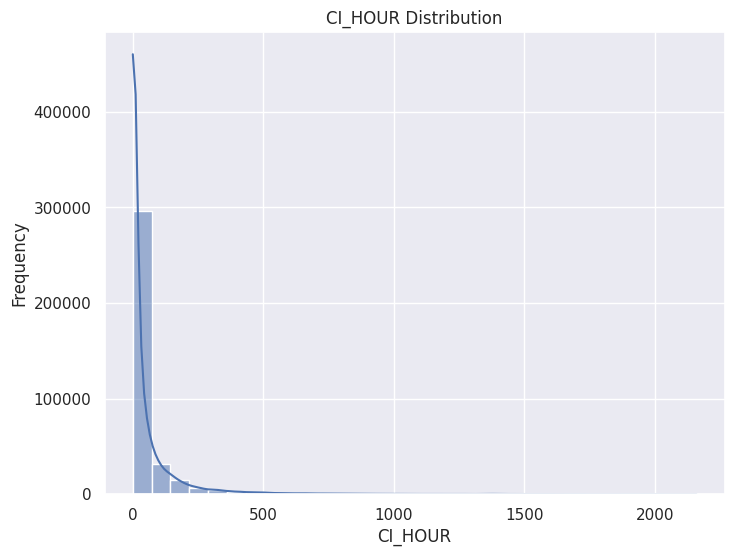

In [ ]:
# CI_HOUR의 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(train['CI_HOUR'], bins=30, kde=True)
plt.title('CI_HOUR Distribution')
plt.xlabel('CI_HOUR')
plt.ylabel('Frequency')
plt.show()

종속변수 값 50이하에 75% 존재

<ipython-input-92-f6e1443bfe40>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')


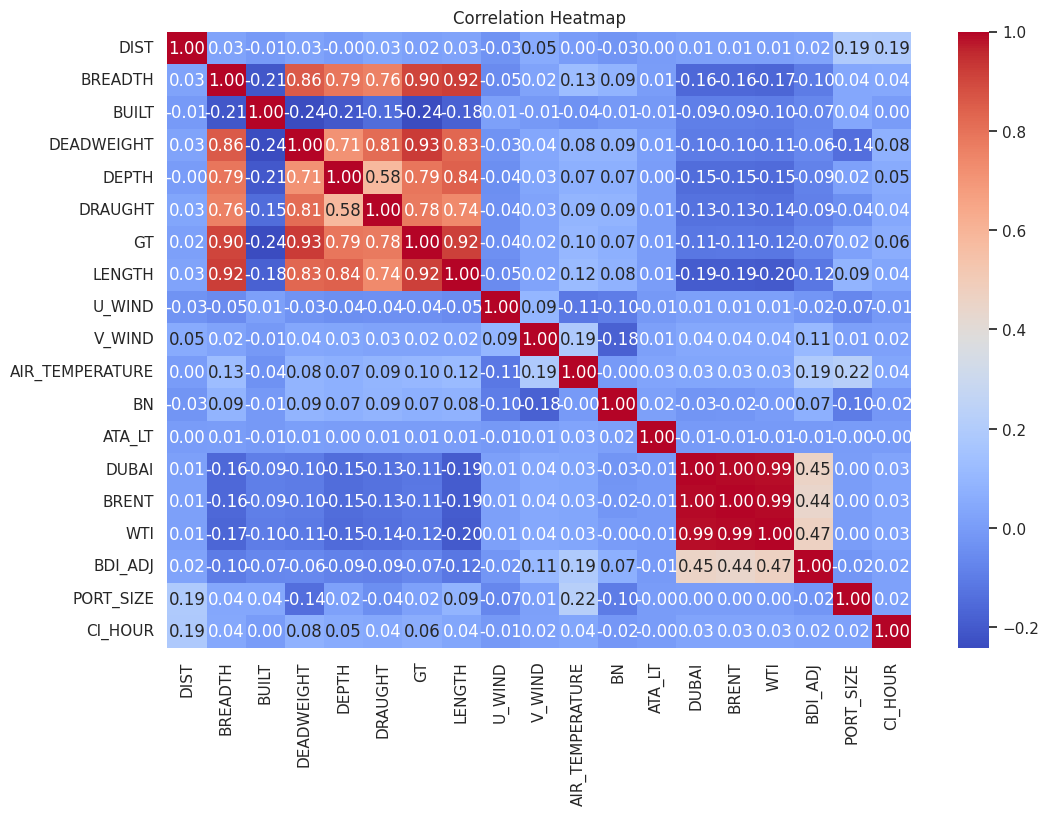

In [ ]:
# 시각화를 통한 데이터 탐색
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-93-27aaf148476e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = train.corr().nlargest(k, 'CI_HOUR')['CI_HOUR'].index


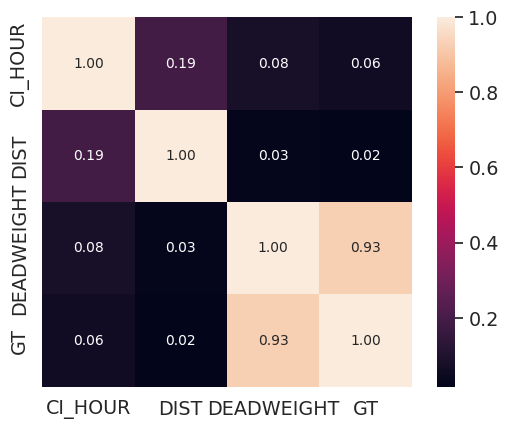

In [ ]:
#CI_HOUR correlation matrix
k = 4 #number of variables for heatmap
cols = train.corr().nlargest(k, 'CI_HOUR')['CI_HOUR'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. DIST 변수가 제일 상관관계 높았지만 유의미한 수준이 아님
2. 기름 값 변수들과 선박의 크기및 용적량 변수들 끼리의 상관계수 높게 측정

* breadth, deadweight, depth, draught, gt, length - [폭, 재화중량톤수, 깊이, 흘수높이, 용적톤수, 길이]
* dubai, brent, wti - [두바이유 값, 브렌트유 값, WTI값]
* deadweight, gt는 비슷한 수치라 상관없지만 나머지 변수들은 다중공선성 고려하여 처리 필요
* 기름 값들은 선박의 연료 값이라 관계 높아도 상관없을것으로 추정

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


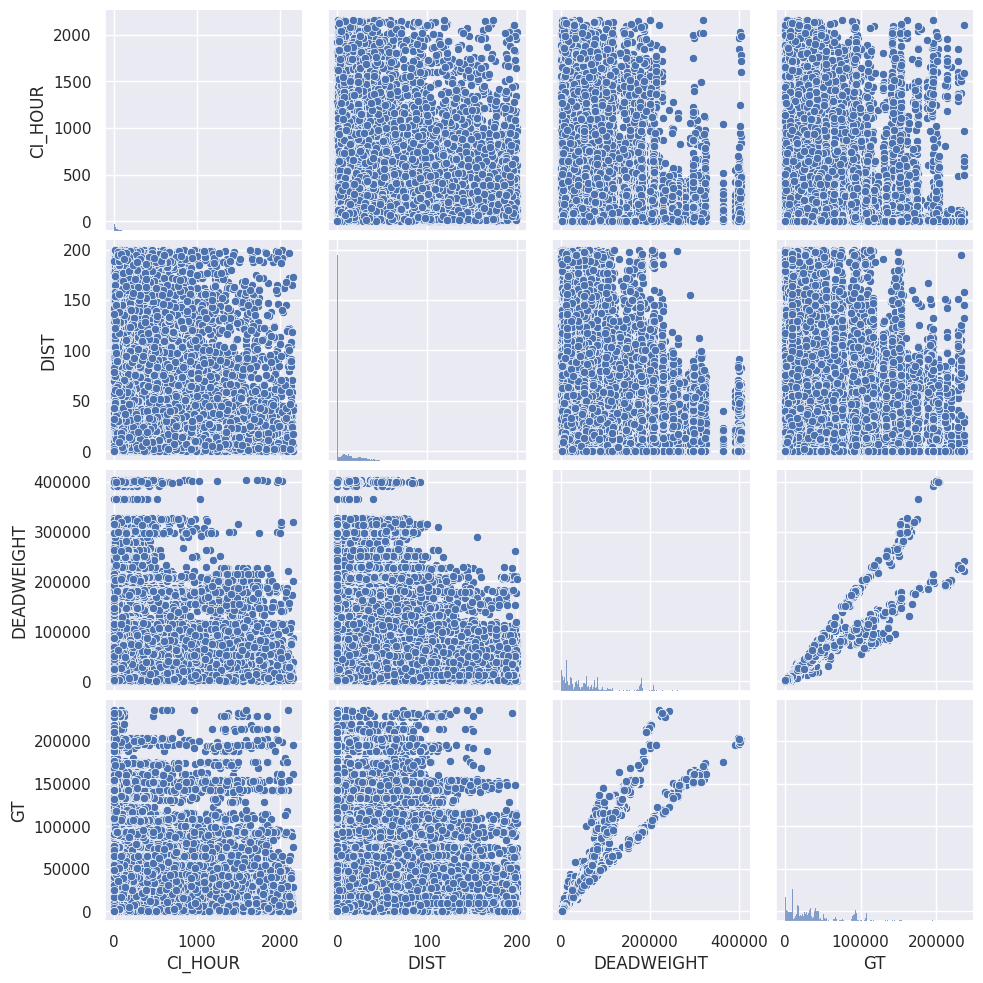

In [ ]:
#scatterplot
sns.set()
cols = ['CI_HOUR', 'DIST','DEADWEIGHT', 'GT']
sns.pairplot(train[cols], size = 2.5)
plt.show();

유의미한 선형적 관계를 볼 수는 없다.

<ipython-input-95-ca4c5cffc42e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CI_HOUR'], fit=norm);


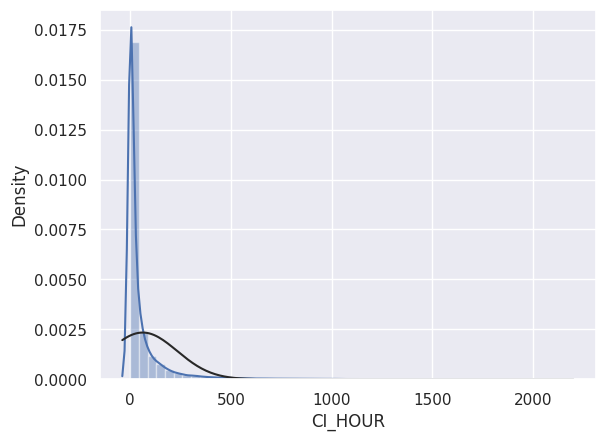

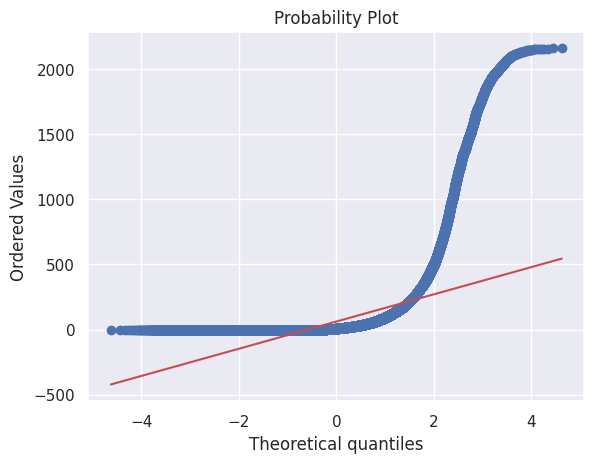

In [ ]:
#histogram and normal probability plot
sns.distplot(train['CI_HOUR'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['CI_HOUR'], plot=plt)

<ipython-input-96-cd883ce3bc3d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CI_HOUR'], fit=norm);


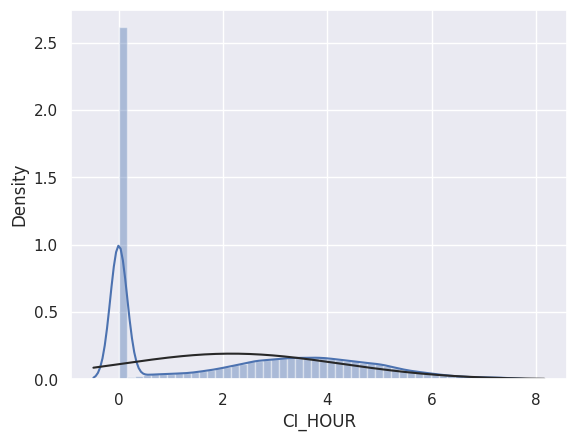

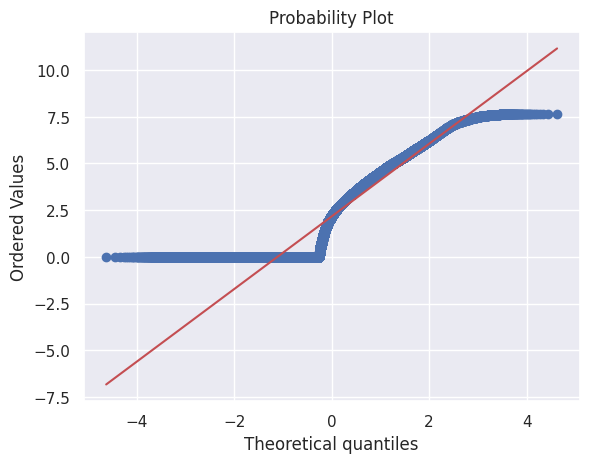

In [ ]:
# 로그 변환
train['CI_HOUR'] = np.log(train['CI_HOUR'] + 1)

#histogram and normal probability plot
sns.distplot(train['CI_HOUR'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['CI_HOUR'], plot=plt)

<ipython-input-97-8b2da0021b68>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['DIST'], fit=norm);


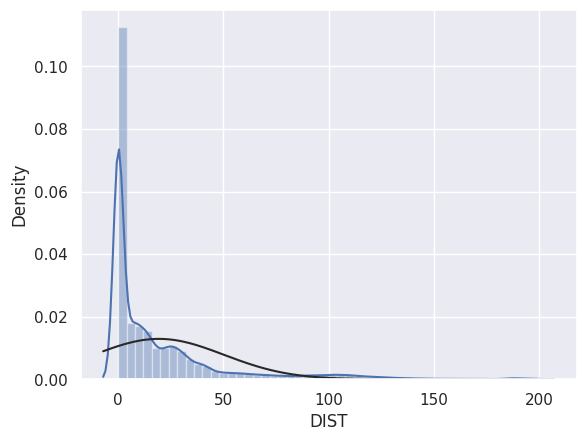

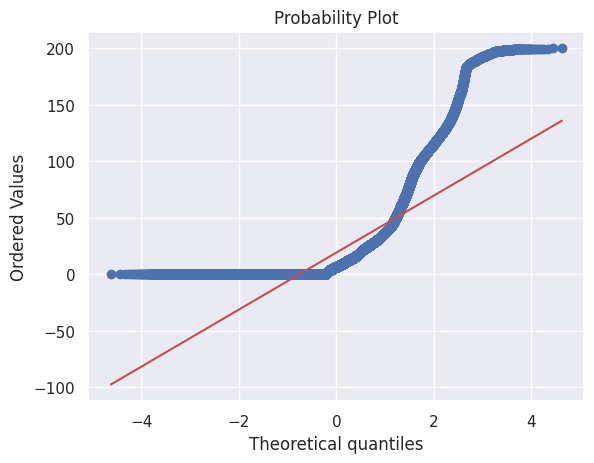

In [ ]:
#histogram and normal probability plot
sns.distplot(train['DIST'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['DIST'], plot=plt)

<ipython-input-98-21b877fb0ed7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['DIST'], fit=norm);


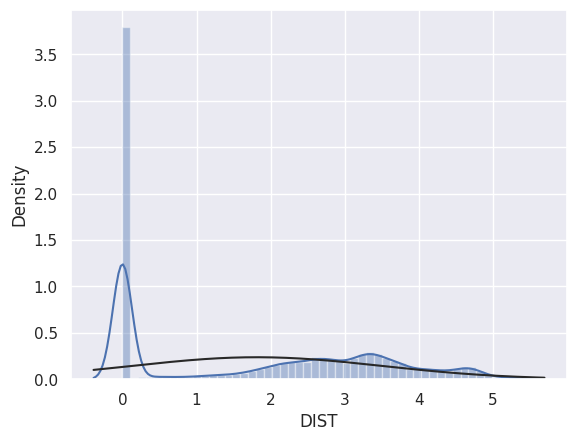

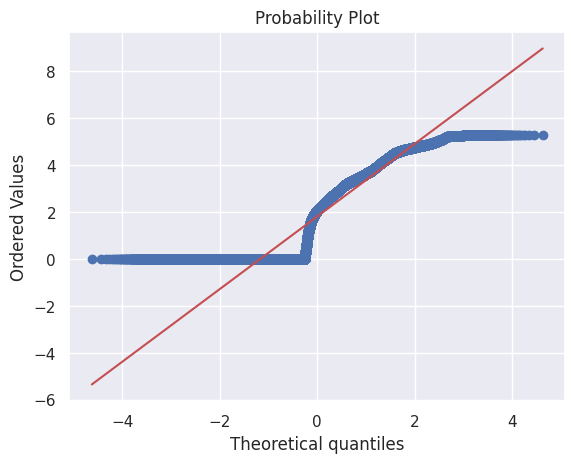

In [ ]:
# 로그 변환
train['DIST'] = np.log(train['DIST'] + 1)

#histogram and normal probability plot
sns.distplot(train['DIST'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['DIST'], plot=plt)

<ipython-input-99-2712637b91b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['DEADWEIGHT'], fit=norm);


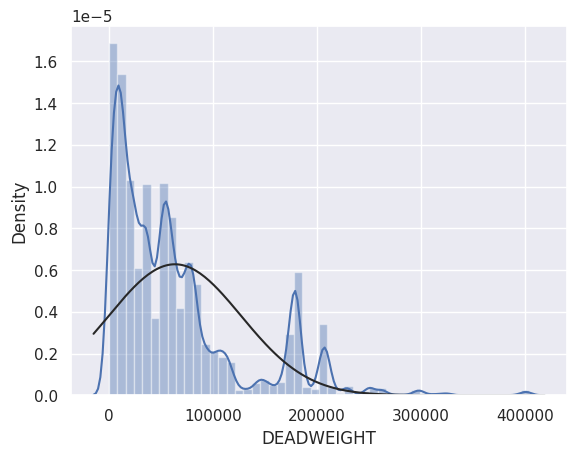

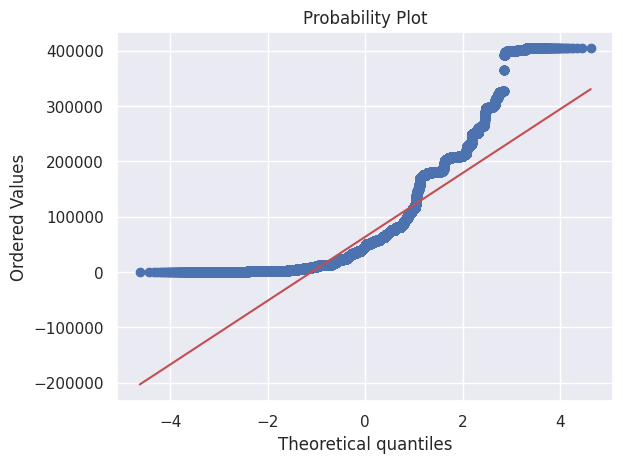

In [ ]:
#histogram and normal probability plot
sns.distplot(train['DEADWEIGHT'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['DEADWEIGHT'], plot=plt)

<ipython-input-100-a378fe2313de>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['DEADWEIGHT'], fit=norm);


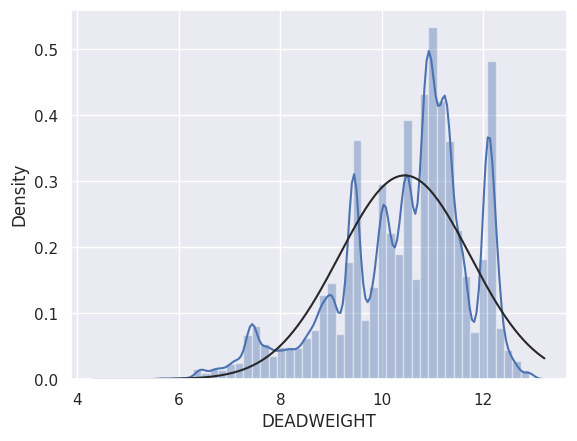

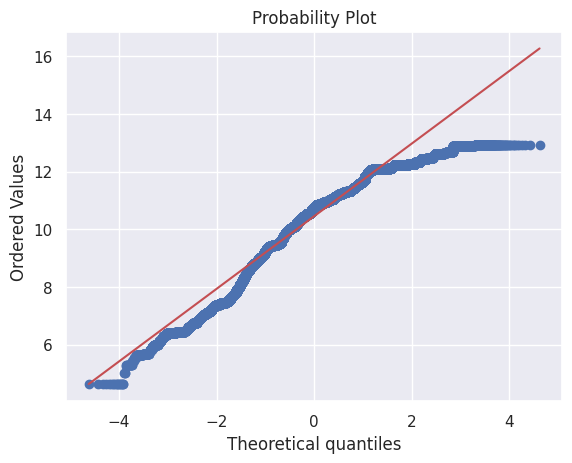

In [ ]:
# 로그 변환
train['DEADWEIGHT'] = np.log(train['DEADWEIGHT'] + 1)

#histogram and normal probability plot
sns.distplot(train['DEADWEIGHT'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['DEADWEIGHT'], plot=plt)

<ipython-input-101-d3c6172d5264>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GT'], fit=norm);


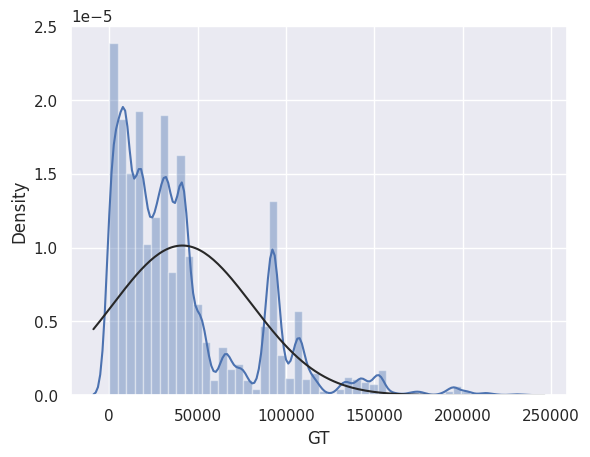

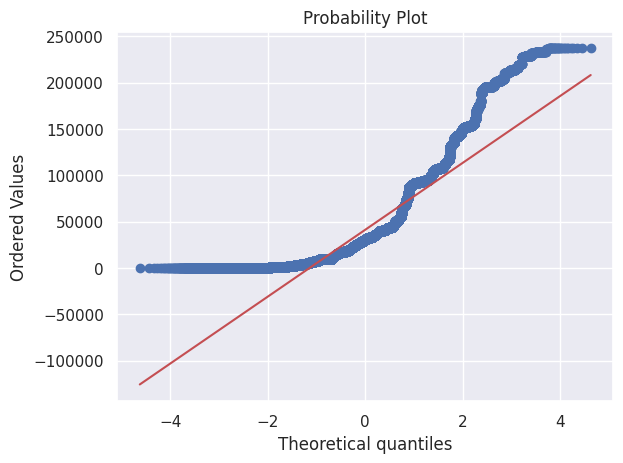

In [ ]:
#histogram and normal probability plot
sns.distplot(train['GT'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GT'], plot=plt)

<ipython-input-102-4eb9655a58c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GT'], fit=norm);


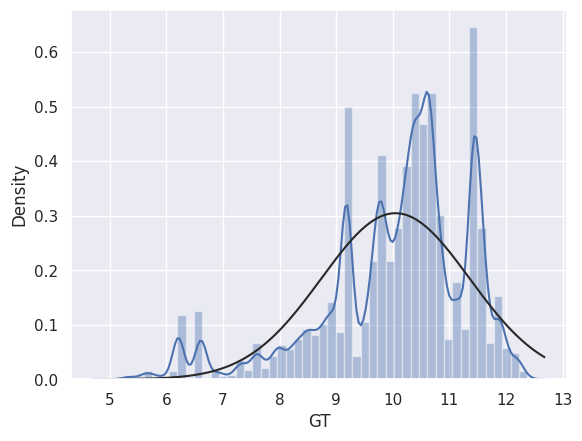

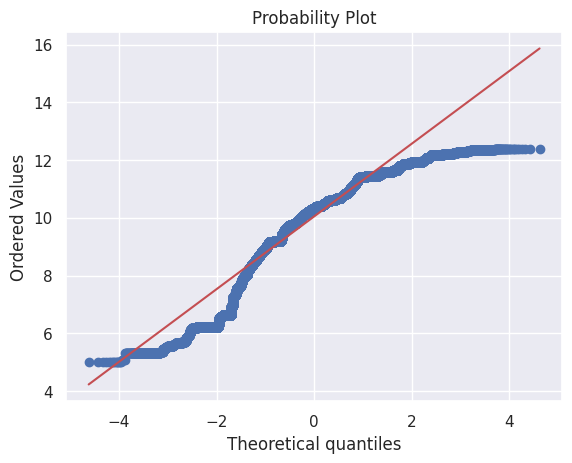

In [ ]:
# 로그 변환
train['GT'] = np.log(train['GT'] + 1)

#histogram and normal probability plot
sns.distplot(train['GT'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GT'], plot=plt)

위의 변수들이 모두 양의 왜도를 같고 0인값들이 많이 존재했다.
따라서 1을 더해 로그변환 후 정규분포를 최대한 따르도록 변환시켜줬다.

In [ ]:
# 데이터 탐색
display(train.head())
display(train.info())
display(train.describe())
# 결측치 확인
display(train.isnull().sum())

,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,DEPTH,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,CN,EKP8,Bulk,3.457470,2020-10-15 4:03,Z517571,30.0,28,11.199597,20.0,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,1.398305
1,CN,EUC8,Container,4.162321,2019-09-17 2:55,U467618,30.0,15,10.542733,20.0,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,2.898043
2,CN,NGG6,Container,4.515545,2019-02-23 6:43,V378315,50.0,7,11.652696,20.0,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,4.603444
3,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,7.307202,10.0,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,RU,NNC2,Container,2.283782,2022-08-13 12:57,D215135,30.0,10,10.225607,10.0,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,4.575026


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367441 entries, 0 to 367440
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARI_CO              367441 non-null  object 
 1   ARI_PO              367441 non-null  object 
 2   SHIP_TYPE_CATEGORY  367441 non-null  object 
 3   DIST                367441 non-null  float64
 4   ATA                 367441 non-null  object 
 5   ID                  367441 non-null  object 
 6   BREADTH             367440 non-null  float64
 7   BUILT               367441 non-null  int64  
 8   DEADWEIGHT          367441 non-null  float64
 9   DEPTH               367440 non-null  float64
 10  DRAUGHT             367440 non-null  float64
 11  GT                  367441 non-null  float64
 12  LENGTH              367440 non-null  float64
 13  SHIPMANAGER         367441 non-null  object 
 14  FLAG                367441 non-null  object 
 15  U_WIND              213955 non-nul

None

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
count,367441.000000,367440.000000,367441.000000,367441.000000,367440.000000,367440.000000,367441.000000,367440.000000,213955.000000,213955.000000,213076.000000,213955.000000,367441.000000,367441.000000,367441.00000,367441.000000,367441.000000,367441.000000,367441.000000
mean,1.813513,30.550239,14.746082,10.451849,16.476540,11.086708,10.046969,205.114468,-0.297587,-0.262955,18.867344,2.706476,11.837903,65.533814,67.55712,63.209494,1348.251333,0.000877,2.163398
std,1.682436,10.957441,7.040392,1.290859,6.047015,4.600020,1.310474,75.867383,3.365912,3.735113,9.727090,1.387629,6.645665,20.916641,20.98516,20.630433,738.961048,0.000838,2.098457
min,0.000000,10.000000,0.000000,4.615121,0.000000,0.000000,5.017280,20.000000,-25.330000,-21.450000,-32.200000,0.000000,0.000000,13.520000,19.33000,-37.630000,286.802297,0.000005,0.000000
25%,0.000000,20.000000,10.000000,9.575053,10.000000,10.000000,9.210440,150.000000,-2.150000,-2.280000,12.200000,1.804286,7.000000,50.020000,51.46000,48.360000,836.349201,0.000142,0.000000
50%,2.070644,30.000000,13.000000,10.766399,20.000000,10.000000,10.332051,190.000000,-0.130000,0.000000,21.600000,2.618063,12.000000,62.930000,64.62000,59.140000,1187.573732,0.000552,2.191591
75%,3.284404,40.000000,18.000000,11.307143,20.000000,10.000000,10.860939,260.000000,1.540000,2.000000,26.600000,3.556008,17.000000,76.880000,79.30000,74.250000,1660.987616,0.001614,3.915085
max,5.303209,60.000000,80.000000,12.909173,30.000000,20.000000,12.375820,400.000000,17.910000,29.690000,47.600000,11.179660,23.000000,127.860000,127.98000,123.700000,4795.865609,0.002615,7.677924


ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                153486
V_WIND                153486
AIR_TEMPERATURE       154365
BN                    153486
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [ ]:
# datetime 컬럼 처리
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

# datetime 컬럼 제거
train.drop(columns='ATA', inplace=True)
test.drop(columns='ATA', inplace=True)

# Categorical 컬럼 인코딩
categorical_features = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

# 결측치 처리
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

Encoding features: 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# 특성과 대상 변수 분리
X = train.drop(columns=['CI_HOUR'])
y = train['CI_HOUR']

# 표준화 (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("RandomForestRegressor MAE:", rf_mae)

RandomForestRegressor MAE: 0.4910070400944448
